In [1]:
import os
import pandas as pd

In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')


C:\Users\mama\AppData\Local\Temp\ipykernel_5704\2873835997.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [5]:
test

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,1.0,1,0,0
1,2,3,4,1.0,1,0,0
2,3,7,4,1.0,1,0,0
3,4,8,4,1.0,1,0,0
4,5,9,4,1.0,1,0,0
...,...,...,...,...,...,...,...
41072,41084,1111,6,1.0,0,0,0
41073,41085,1112,6,1.0,0,0,0
41074,41086,1113,6,1.0,0,0,0
41075,41087,1114,6,1.0,0,0,0


In [6]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
merged_df = train.merge(store, how='left', on='Store')
merged_test_df = test.merge(store, how='left', on='Store')

In [8]:
merged_test_df

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41072,41084,1111,6,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41073,41085,1112,6,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41074,41086,1113,6,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41075,41087,1114,6,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [12]:
split_date(merged_df)

In [13]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


remove the rows where the store is closed. 


In [14]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [15]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1




 number of months for which a competitor has been open near the store


In [16]:
def comp_months(df):
  df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [17]:
comp_months(merged_df)


In [18]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2',]

target_col = 'Sales'

In [19]:
inputs = merged_df[input_cols].copy()
target = merged_df[target_col].copy()

In [20]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,1,1,2013,1,0
1016827,733,2,0,a,1,b,b,860.0,159.0,1,1,2013,1,0
1016863,769,2,0,a,1,b,b,840.0,0.0,1,1,2013,1,1
1017042,948,2,0,a,1,b,b,1430.0,0.0,1,1,2013,1,0


In [21]:
inputs['StateHoliday'] = inputs['StateHoliday'].replace('0', 'No')
inputs['StateHoliday'] = inputs['StateHoliday'].replace(0, 'No')

In [22]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2',
              'Day', 'Month', 'Year', 'WeekOfYear',]
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment','StateHoliday']


In [23]:
inputs[categorical_cols].isna().sum()

DayOfWeek       0
StoreType       0
Assortment      0
StateHoliday    0
dtype: int64

In [24]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [25]:


max_distance = inputs.CompetitionDistance.max()
max_distance



np.float64(75860.0)

In [26]:
inputs['CompetitionDistance'].fillna(max_distance * 2, inplace=True)

In [27]:
inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(inputs[numeric_cols])

MinMaxScaler()

In [31]:

MinMaxScaler()

MinMaxScaler()

In [32]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

In [33]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2
0,0.000000,5,1.0,No,1.0,c,a,0.008240,0.059163,1.0,0.545455,1.0,0.588235,0.0
1,0.000898,5,1.0,No,1.0,a,a,0.003626,0.066378,1.0,0.545455,1.0,0.588235,1.0
2,0.001795,5,1.0,No,1.0,a,a,0.093013,0.074315,1.0,0.545455,1.0,0.588235,1.0
3,0.002693,5,1.0,No,1.0,c,c,0.003955,0.050505,1.0,0.545455,1.0,0.588235,0.0
4,0.003591,5,1.0,No,1.0,a,a,0.197034,0.002165,1.0,0.545455,1.0,0.588235,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,2,0.0,a,1.0,b,a,0.000857,0.054834,0.0,0.000000,0.0,0.000000,0.0
1016827,0.657092,2,0.0,a,1.0,b,b,0.005537,0.114719,0.0,0.000000,0.0,0.000000,0.0
1016863,0.689408,2,0.0,a,1.0,b,b,0.005405,0.000000,0.0,0.000000,0.0,0.000000,1.0
1017042,0.850090,2,0.0,a,1.0,b,b,0.009295,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [36]:
encoder.fit(inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [37]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))


In [38]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

In [39]:
X = inputs[numeric_cols + encoded_cols]

In [40]:
X

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Day,Month,Year,WeekOfYear,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_No,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0.000000,1.0,1.0,0.008240,0.059163,0.0,1.0,0.545455,1.0,0.588235,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000898,1.0,1.0,0.003626,0.066378,1.0,1.0,0.545455,1.0,0.588235,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.001795,1.0,1.0,0.093013,0.074315,1.0,1.0,0.545455,1.0,0.588235,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.002693,1.0,1.0,0.003955,0.050505,0.0,1.0,0.545455,1.0,0.588235,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.003591,1.0,1.0,0.197034,0.002165,0.0,1.0,0.545455,1.0,0.588235,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,0.0,1.0,0.000857,0.054834,0.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1016827,0.657092,0.0,1.0,0.005537,0.114719,0.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016863,0.689408,0.0,1.0,0.005405,0.000000,1.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1017042,0.850090,0.0,1.0,0.009295,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [41]:
y = target

In [42]:
# First lets split the training dataset into test and train and then use them to compare the two choosen models (XGBRegressor and RandomForestRegressor)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
# Before fiting the data into the model, lets find the best number of estimators for both models
def mae_score(estimator):
    model1 = RandomForestRegressor(n_estimators= estimator, random_state=0)
    val_score = -1 * cross_val_score(model1, X, y, cv=2, scoring='neg_mean_absolute_error')

    return val_score.mean()

In [44]:
result = {}
estimator = [10]

for i in estimator:
    result[i] = mae_score(i)


In [ ]:

%matplotlib inline
plt.plot(list(result.keys()), list(result.values()))
plt.show()

In [ ]:
# Before fiting the data into the model, lets find the best number of estimators for both models
def mae_score(estimator):
    model2 = XGBRegressor(n_estimators = estimator, learning_rate = 0.05, n_jobs=4)
    val_score = -1 * cross_val_score(model2, X, y, cv=2, scoring='neg_mean_absolute_error')

    return val_score.mean()

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
model.fit(X, target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
preds = model.predict(X)

In [ ]:
preds

array([8021.996 , 7663.2285, 8584.852 , ..., 7540.903 , 7539.4336,
       9778.964 ], dtype=float32)

Evaluating

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
  return mean_squared_error(a, b, squared=False)

In [ ]:
rmse(preds, target)

np.float64(2399.4729793265265)

In [ ]:
merged_df.Sales.min(), merged_df.Sales.max()

(np.int64(0), np.int64(41551))

In [ ]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
1,Promo,0.431753
10,DayOfWeek_1,0.090701
18,StoreType_b,0.069578
21,Assortment_a,0.051793
5,Promo2,0.044245
3,CompetitionDistance,0.035661
20,StoreType_d,0.033135
9,WeekOfYear,0.028941
7,Month,0.026356
11,DayOfWeek_2,0.025761


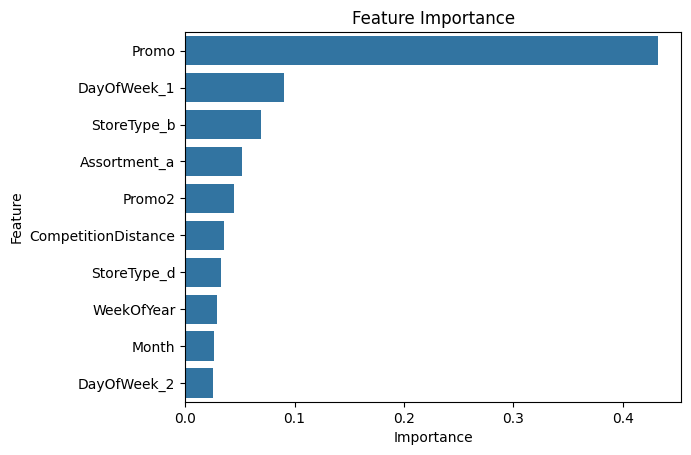

In [ ]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature');

In [ ]:
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestClassifier
